This is a tester notebook to look into the small nonheirarchical models I've fit for subjects 4,5, and 6.

In [2]:
import arviz as az
import numpy as np
from scipy.special import softmax

In [28]:
# starting with subject 4
trace = az.from_netcdf("results_n100_t500/trace_subject_4.nc")
az.summary(trace)  # Parameter estimates and diagnostics

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"base_mu[0, 0]",0.284,1.069,-2.107,2.043,0.168,0.120,46.0,324.0,1.07
"base_mu[0, 1]",0.275,1.058,-1.611,2.276,0.200,0.143,28.0,257.0,1.12
"base_mu[1, 0]",0.740,0.615,-0.951,1.140,0.165,0.119,35.0,89.0,1.40
"base_mu[1, 1]",0.825,0.893,-0.729,2.407,0.214,0.154,20.0,155.0,1.17
"beta_game[0, 0]",-0.066,0.900,-2.292,1.379,0.037,0.057,554.0,298.0,1.41
"beta_game[0, 1]",0.076,0.829,-1.604,1.445,0.038,0.047,488.0,282.0,1.01
"beta_game[1, 0]",-0.063,0.453,-0.808,1.099,0.029,0.071,339.0,44.0,1.50
"beta_game[1, 1]",0.227,0.759,-1.017,1.724,0.041,0.054,369.0,58.0,1.04
"beta_time[0, 0]",0.052,0.835,-1.749,1.565,0.039,0.071,450.0,259.0,1.52
"beta_time[0, 1]",0.008,0.854,-1.529,1.843,0.030,0.065,788.0,283.0,1.43


<xarray.Dataset> Size: 352B
Dimensions:          (base_mu_dim_0: 2, base_mu_dim_1: 2, beta_game_dim_0: 2,
                      beta_game_dim_1: 2, beta_time_dim_0: 2,
                      beta_time_dim_1: 2, pi_logits_dim_0: 2,
                      A_logits_dim_0: 2, A_logits_dim_1: 2, sigma_dim_0: 2,
                      sigma_dim_1: 2)
Coordinates:
  * base_mu_dim_0    (base_mu_dim_0) int64 16B 0 1
  * base_mu_dim_1    (base_mu_dim_1) int64 16B 0 1
  * beta_game_dim_0  (beta_game_dim_0) int64 16B 0 1
  * beta_game_dim_1  (beta_game_dim_1) int64 16B 0 1
  * beta_time_dim_0  (beta_time_dim_0) int64 16B 0 1
  * beta_time_dim_1  (beta_time_dim_1) int64 16B 0 1
  * pi_logits_dim_0  (pi_logits_dim_0) int64 16B 0 1
  * A_logits_dim_0   (A_logits_dim_0) int64 16B 0 1
  * A_logits_dim_1   (A_logits_dim_1) int64 16B 0 1
  * sigma_dim_0      (sigma_dim_0) int64 16B 0 1
  * sigma_dim_1      (sigma_dim_1) int64 16B 0 1
Data variables:
    base_mu          (base_mu_dim_0, base_mu_dim_1) float64 32B 1.066 ... 1.168
    beta_game        (beta_game_dim_0, beta_game_dim_1) float64 32B 1.412 ......
    beta_time        (beta_time_dim_0, beta_time_dim_1) float64 32B 1.521 ......
    pi_logits        (pi_logits_dim_0) float64 16B 1.055 1.049
    A_logits         (A_logits_dim_0, A_logits_dim_1) float64 32B 1.229 ... 1...
    sigma            (sigma_dim_0, sigma_dim_1) float64 32B 1.178 ... 1.498

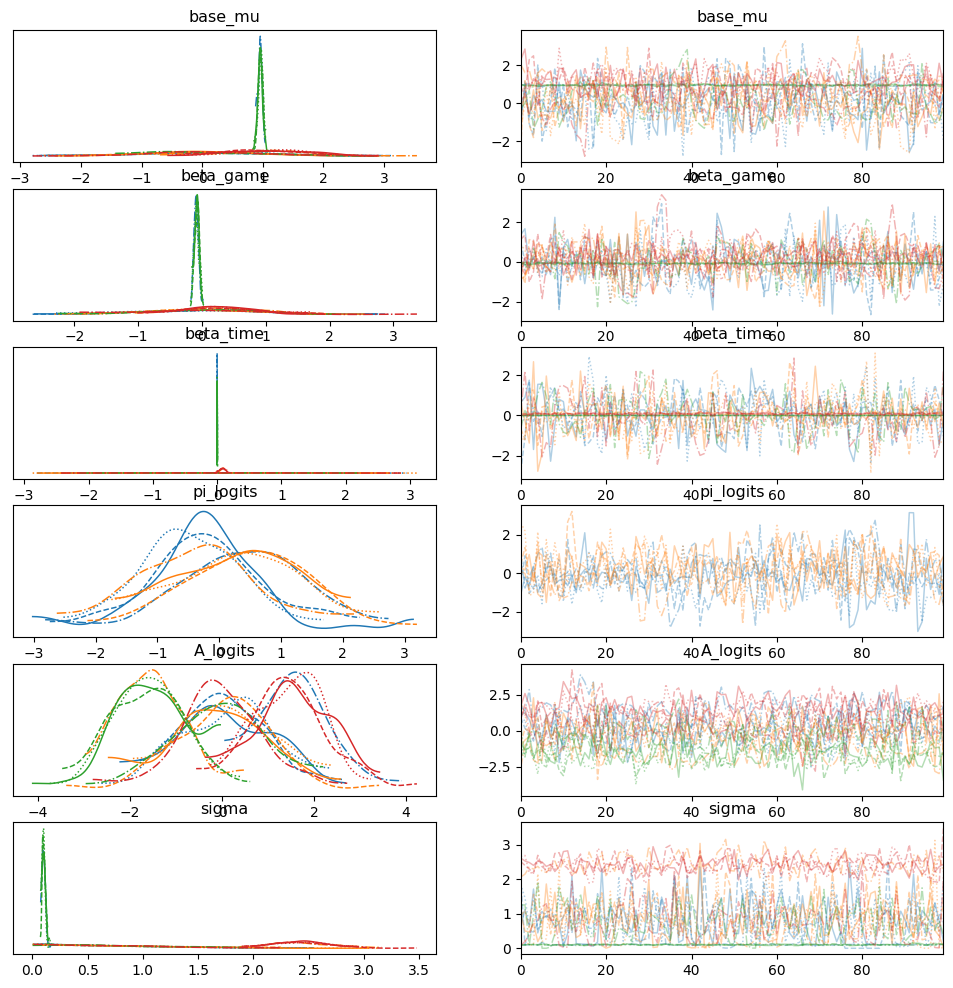

In [4]:
# check convergence:
az.plot_trace(trace)  # Visual diagnostics
az.rhat(trace)  # R-hat convergence diagnostic

In [5]:
# convert back to probabilities
pi_samples = softmax(trace.posterior.pi_logits.values)
print(f"State 1 initial probability: {pi_samples.mean()}")

State 1 initial probability: 0.0012499999999999998


interpretation: most people begin in state 2

In [6]:
A_samples = softmax(trace.posterior.A_logits.values, axis=-1)
print("Transition probabilities:")
print(f"Stay in State 1: {A_samples[0,0].mean():.3f}")
print(f"Switch 1→2: {A_samples[0,1].mean():.3f}")
print(f"Switch 2→1: {A_samples[1,0].mean():.3f}") 
print(f"Stay in State 2: {A_samples[1,1].mean():.3f}")

Transition probabilities:
Stay in State 1: 0.500
Switch 1→2: 0.500
Switch 2→1: 0.500
Stay in State 2: 0.500


In [7]:
summary = az.summary(trace)
print(summary)

                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
base_mu[0, 0]    0.284  1.069  -2.107    2.043      0.168    0.120      46.0   
base_mu[0, 1]    0.275  1.058  -1.611    2.276      0.200    0.143      28.0   
base_mu[1, 0]    0.740  0.615  -0.951    1.140      0.165    0.119      35.0   
base_mu[1, 1]    0.825  0.893  -0.729    2.407      0.214    0.154      20.0   
beta_game[0, 0] -0.066  0.900  -2.292    1.379      0.037    0.057     554.0   
beta_game[0, 1]  0.076  0.829  -1.604    1.445      0.038    0.047     488.0   
beta_game[1, 0] -0.063  0.453  -0.808    1.099      0.029    0.071     339.0   
beta_game[1, 1]  0.227  0.759  -1.017    1.724      0.041    0.054     369.0   
beta_time[0, 0]  0.052  0.835  -1.749    1.565      0.039    0.071     450.0   
beta_time[0, 1]  0.008  0.854  -1.529    1.843      0.030    0.065     788.0   
beta_time[1, 0]  0.020  0.486  -1.109    1.303      0.024    0.091     378.0   
beta_time[1, 1]  0.034  0.556  -1.650   

interpretation: state 0 (low accuracy, not much rest), state 1 (high accuracy, larger amount of rest)

In [10]:
# More explicit indexing
state0_acc = trace.posterior.base_mu.isel(base_mu_dim_0=0, base_mu_dim_1=0)  # State 0, Variable 0 (accuracy)
state1_acc = trace.posterior.base_mu.isel(base_mu_dim_0=1, base_mu_dim_1=0)  # State 1, Variable 0 (accuracy)
state0_rest = trace.posterior.base_mu.isel(base_mu_dim_0=0, base_mu_dim_1=1) # State 0, Variable 1 (rest)
state1_rest = trace.posterior.base_mu.isel(base_mu_dim_0=1, base_mu_dim_1=1) # State 1, Variable 1 (rest)

print(f"State 0 accuracy: {state0_acc.mean():.3f}")
print(f"State 1 accuracy: {state1_acc.mean():.3f}")
print(f"State 0 rest duration: {state0_rest.mean():.3f}")
print(f"State 1 rest duration: {state1_rest.mean():.3f}")

State 0 accuracy: 0.284
State 1 accuracy: 0.740
State 0 rest duration: 0.275
State 1 rest duration: 0.825


In [16]:
# Diagonal of transition matrix
stability = A_samples.diagonal(axis1=-2, axis2=-1).mean(axis=(0,1))
print(f"Average state stability: {stability}")

print(f"Average time spent in State 0: {1/(1-stability[0]):.1f} trials")
print(f"Average time spent in State 1: {1/(1-stability[1]):.1f} trials")

Average state stability: [0.61876288 0.8348941 ]
Average time spent in State 0: 2.6 trials
Average time spent in State 1: 6.1 trials


interpretation: state 1 is more persistent

In [18]:
# Time effects on ACCURACY for each state
time_effect_acc_state0 = trace.posterior.beta_time.sel(beta_time_dim_0=0, beta_time_dim_1=0)  # State 0, Accuracy
time_effect_acc_state1 = trace.posterior.beta_time.sel(beta_time_dim_0=1, beta_time_dim_1=0)  # State 1, Accuracy

# Time effects on REST DURATION for each state  
time_effect_rest_state0 = trace.posterior.beta_time.sel(beta_time_dim_0=0, beta_time_dim_1=1)  # State 0, Rest
time_effect_rest_state1 = trace.posterior.beta_time.sel(beta_time_dim_0=1, beta_time_dim_1=1)  # State 1, Rest

print(f"Time effect on accuracy - State 0: {time_effect_acc_state0.mean():.3f}")
print(f"Time effect on accuracy - State 1: {time_effect_acc_state1.mean():.3f}")
print(f"Time effect on rest - State 0: {time_effect_rest_state0.mean():.3f}")
print(f"Time effect on rest - State 1: {time_effect_rest_state1.mean():.3f}")

Time effect on accuracy - State 0: 0.052
Time effect on accuracy - State 1: 0.020
Time effect on rest - State 0: 0.008
Time effect on rest - State 1: 0.034


In [27]:
def check_model_health(trace):
    # 1. Convergence
    rhat_values = az.rhat(trace).max()
    ess_values = az.ess(trace).min()

    rhat_max = float(rhat_values.to_array().max().values)
    ess_min = float(ess_values.to_array().min().values)
    
    print("=== CONVERGENCE ===")
    print(f"Max R-hat: {rhat_max} (want < 1.1)") # how much agreement there is between chains (higher rhat less agreement)
    print(f"Min ESS: {ess_min} (want > 100)") # ESS = num independent samples (ther emight be more but this is how much info they got)
    
    # 2. States are different
    base_mu = trace.posterior.base_mu.mean(dim=['chain', 'draw'])
    state_diff = abs(base_mu[0] - base_mu[1]).values
    
    print("\n=== STATE DIFFERENCES ===")
    print(f"Accuracy difference: {state_diff[0]}")
    print(f"Rest difference: {state_diff[1]}")
    
    # 3. Transition matrix
    A_logits = trace.posterior.A_logits.mean(dim=['chain', 'draw'])
    A = softmax(A_logits.values, axis=-1)
    
    print("\n=== TRANSITION MATRIX ===")
    print(f"Stay in State 0: {A[0,0]}")
    print(f"Stay in State 1: {A[1,1]}")
    
    # Overall assessment
    print("\n=== ASSESSMENT ===")
    print(rhat_max)
    print(ess_min)
    if rhat_max < 1.1 and ess_min > 100:
        print("Convergence looks good")
    else:
        print("Big convergence issues")
        
    if min(state_diff) > 0.05:
        print("States are distinct")
    else:
        print("States might not be distinct")

# Run the check
check_model_health(trace)

=== CONVERGENCE ===
Max R-hat: 1.5246006354273554 (want < 1.1)
Min ESS: 8.327075130811727 (want > 100)

=== STATE DIFFERENCES ===
Accuracy difference: 0.4562111520375702
Rest difference: 0.5500464499670348

=== TRANSITION MATRIX ===
Stay in State 0: 0.6932796207360914
Stay in State 1: 0.908813705536786

=== ASSESSMENT ===
1.5246006354273554
8.327075130811727
Big convergence issues
States are distinct
